In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\dsail\Downloads\HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
#Data exploration and visualization

In [4]:
left = df[df.left==1]
left.shape

(3571, 10)

In [5]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [6]:
#Average numbers for all columns

In [7]:
df.groupby('left').mean()


C:\Users\dsail\AppData\Local\Temp\ipykernel_16992\722136348.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [8]:
#Impact of salary on employee retention

<Axes: xlabel='salary'>

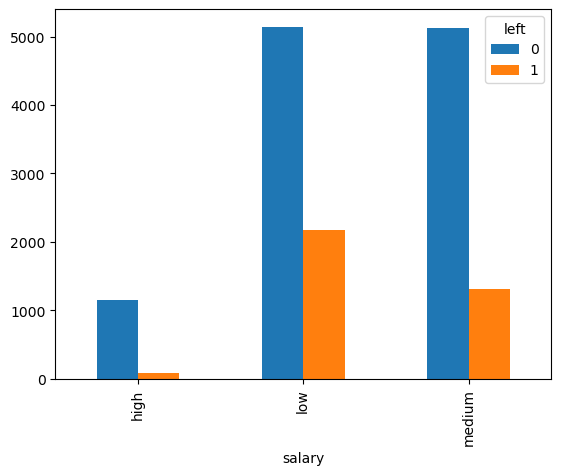

In [9]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [10]:
#Department wise employee retention rate

In [11]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'Department'

In [12]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [13]:
salary_dummies = pd.get_dummies(subdf.salary,prefix = 'salary')

In [14]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [15]:
df_with_dummies.drop('salary',inplace=True,axis=1)

In [16]:
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [17]:
x=df_with_dummies
y=df.left

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.6)

In [19]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
2001,0.82,202,0,0,1,0
14186,0.59,272,0,1,0,0
9656,0.93,190,0,0,0,1
4221,0.71,238,0,1,0,0
14320,0.40,155,0,0,0,1
...,...,...,...,...,...,...
3028,0.80,164,0,0,0,1
1469,0.40,296,0,0,0,1
9844,0.51,205,0,1,0,0
4727,0.76,135,1,0,1,0


In [22]:
x_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
14696,0.32,172,0,0,1,0
13197,0.89,190,0,0,1,0
4944,0.91,273,0,0,1,0
10504,0.59,179,0,0,0,1
7489,0.49,227,0,0,0,1
...,...,...,...,...,...,...
2697,0.76,216,0,0,1,0
2588,0.52,226,0,0,1,0
12555,0.10,281,0,0,1,0
1031,0.11,295,0,0,1,0


In [23]:
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
2001,0.82,202,0,0,1,0
14186,0.59,272,0,1,0,0
9656,0.93,190,0,0,0,1
4221,0.71,238,0,1,0,0
14320,0.40,155,0,0,0,1
...,...,...,...,...,...,...
3028,0.80,164,0,0,0,1
1469,0.40,296,0,0,0,1
9844,0.51,205,0,1,0,0
4727,0.76,135,1,0,1,0


In [26]:
model.score(x_test,y_test)

0.7764444444444445

In [27]:
model.predict([[0.32,172,0,0,1,0]])

D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)